In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

## Exploratory Data Analysis (EDA)

In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\ayshu\Downloads\Obesity.csv")

In [5]:
# Understanding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64


In [9]:
#handling these missing values using imputation 
# Impute missing values for numerical columns with the mean
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [10]:
# Impute missing values for categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [11]:
# Check if there are any remaining missing values
missing_values_after_imputation = data.isnull().sum()
print("Missing Values after imputation:")
print(missing_values_after_imputation)

Missing Values after imputation:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Visualize the distributions of numerical features

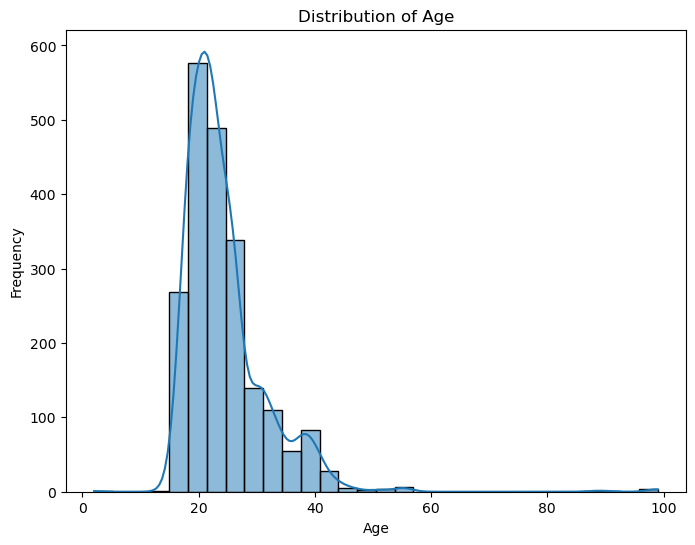

In [13]:
# Visualize the distributions of numerical features
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

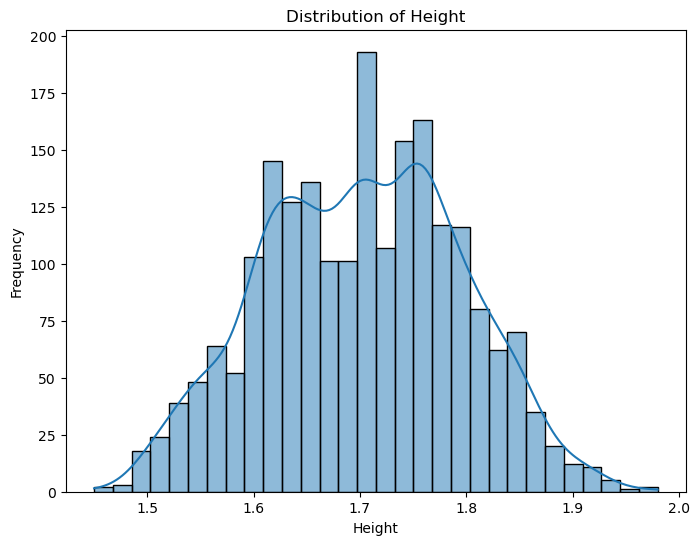

In [14]:
# Distribution of Height
plt.figure(figsize=(8, 6))
sns.histplot(data['Height'], bins=30, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

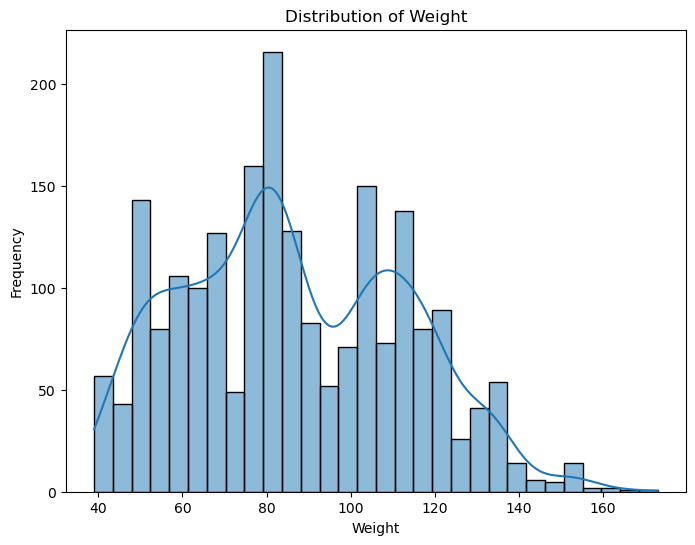

In [15]:
# Distribution of Weight
plt.figure(figsize=(8, 6))
sns.histplot(data['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

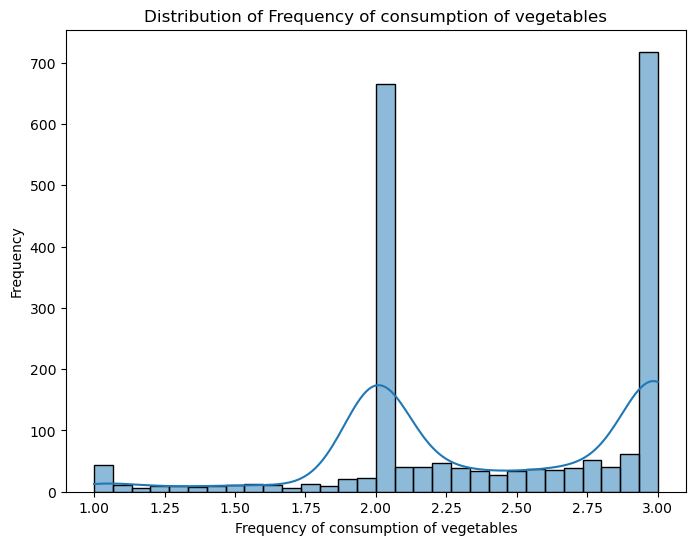

In [27]:
# Distribution of FCVC
plt.figure(figsize=(8, 6))
sns.histplot(data['FCVC'], bins=30, kde=True)
plt.title('Distribution of Frequency of consumption of vegetables')
plt.xlabel('Frequency of consumption of vegetables')
plt.ylabel('Frequency')
plt.show()

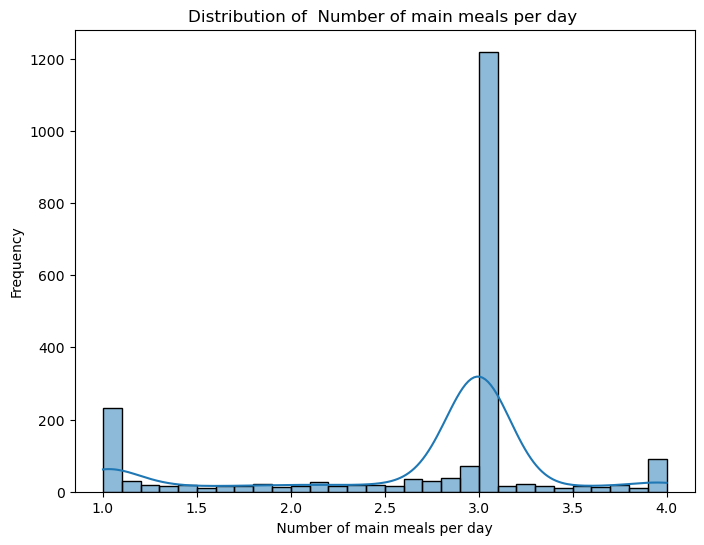

In [28]:
# Distribution of NCP
plt.figure(figsize=(8, 6))
sns.histplot(data['NCP'], bins=30, kde=True)
plt.title('Distribution of  Number of main meals per day ')
plt.xlabel(' Number of main meals per day ')
plt.ylabel('Frequency')
plt.show()

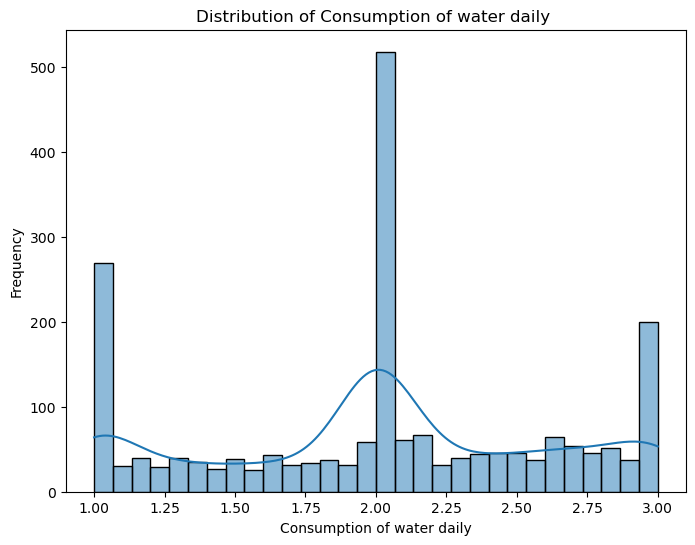

In [26]:
# Distribution of CH2O
plt.figure(figsize=(8, 6))
sns.histplot(data['CH2O'], bins=30, kde=True)
plt.title('Distribution of Consumption of water daily ')
plt.xlabel('Consumption of water daily' )
plt.ylabel('Frequency')
plt.show()

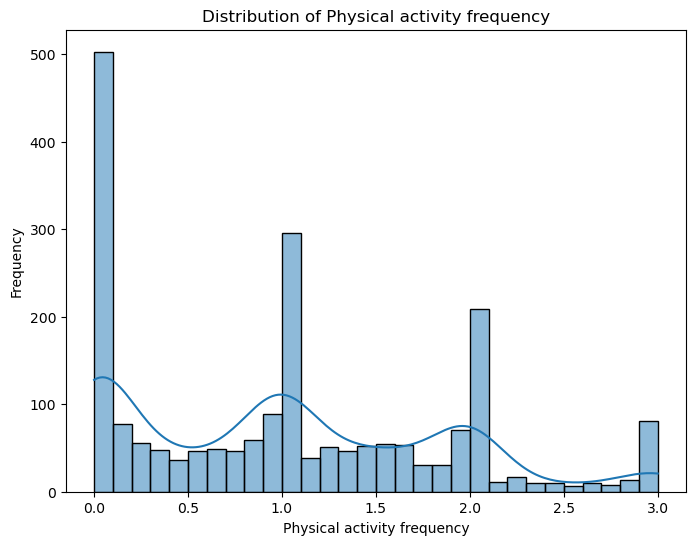

In [23]:
# Distribution of FAF
plt.figure(figsize=(8, 6))
sns.histplot(data['FAF'], bins=30, kde=True)
plt.title('Distribution of Physical activity frequency')
plt.xlabel('Physical activity frequency')
plt.ylabel('Frequency')
plt.show()

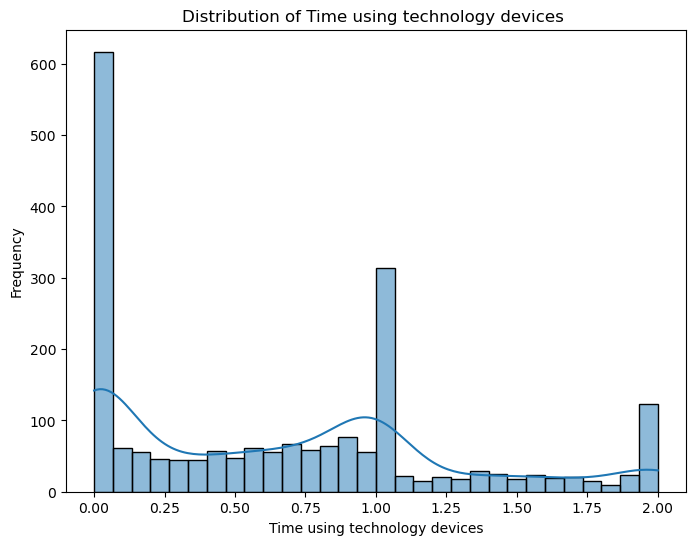

In [24]:
# Distribution of TUE
plt.figure(figsize=(8, 6))
sns.histplot(data['TUE'], bins=30, kde=True)
plt.title('Distribution of Time using technology devices ')
plt.xlabel('Time using technology devices')
plt.ylabel('Frequency')
plt.show()

## Visualize the distributions of categorical features

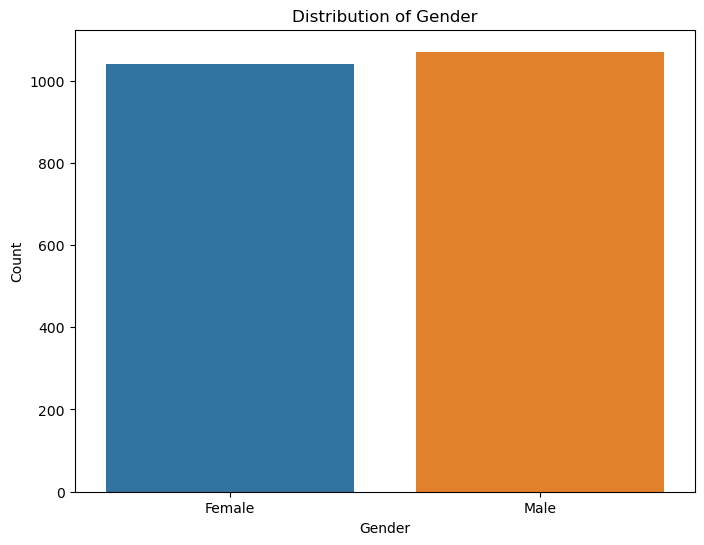

In [29]:
# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

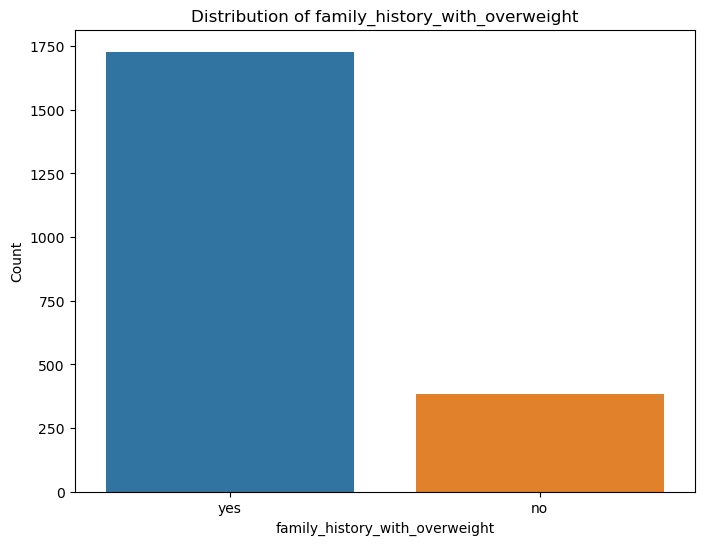

In [30]:
# Distribution of family_history_with_overweight
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history_with_overweight', data=data)
plt.title('Distribution of family_history_with_overweight')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.show()

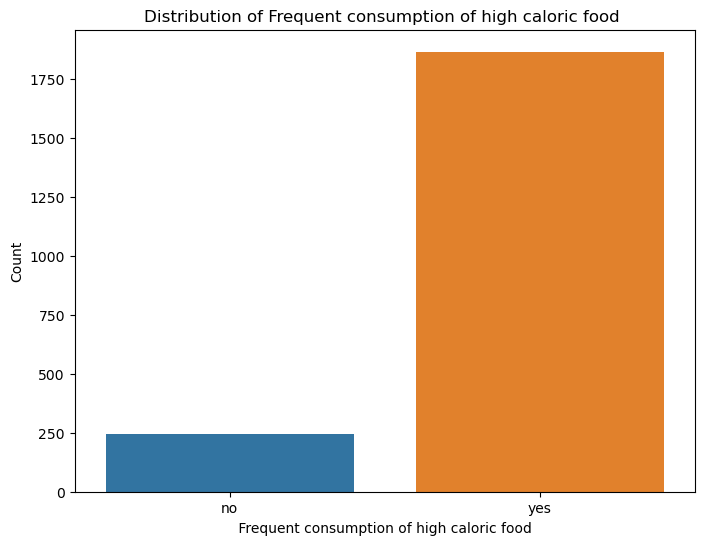

In [49]:
# Distribution of FAVC
plt.figure(figsize=(8, 6))
sns.countplot(x='FAVC', data=data)
plt.title('Distribution of Frequent consumption of high caloric food ')
plt.xlabel(' Frequent consumption of high caloric food ')
plt.ylabel('Count')
plt.show()

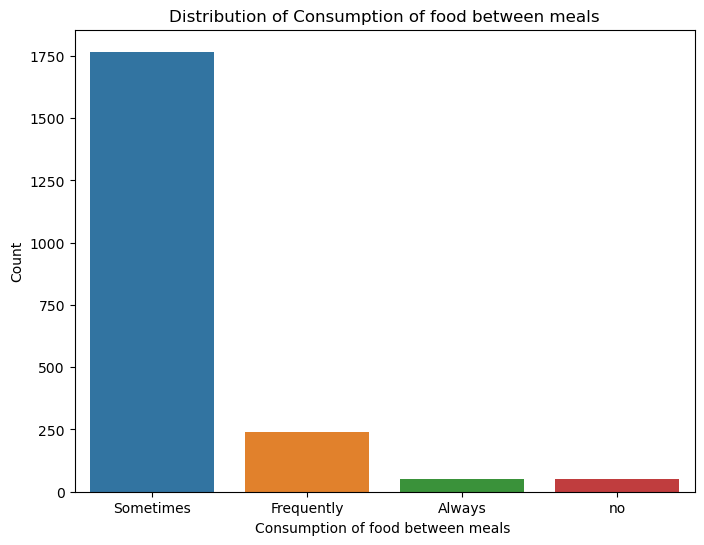

In [48]:
# Distribution of CAEC
plt.figure(figsize=(8, 6))
sns.countplot(x='CAEC', data=data)
plt.title('Distribution of Consumption of food between meals')
plt.xlabel('Consumption of food between meals ')
plt.ylabel('Count')
plt.show()

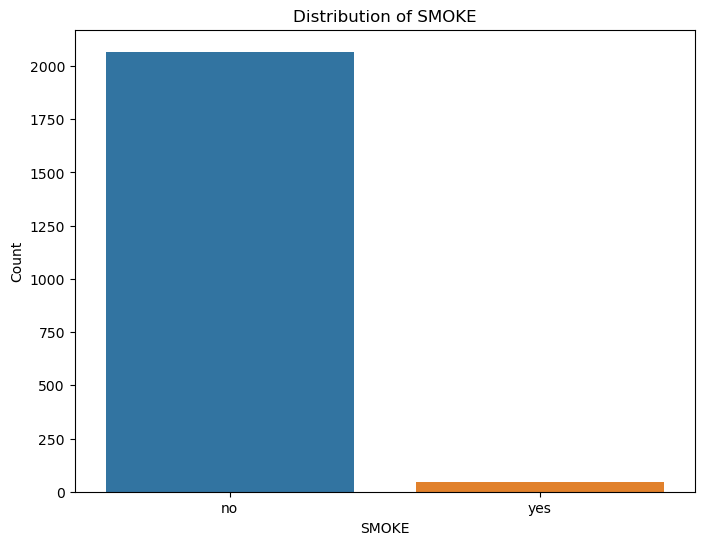

In [47]:
# Distribution of SMOKE
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKE', data=data)
plt.title('Distribution of SMOKE')
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.show()

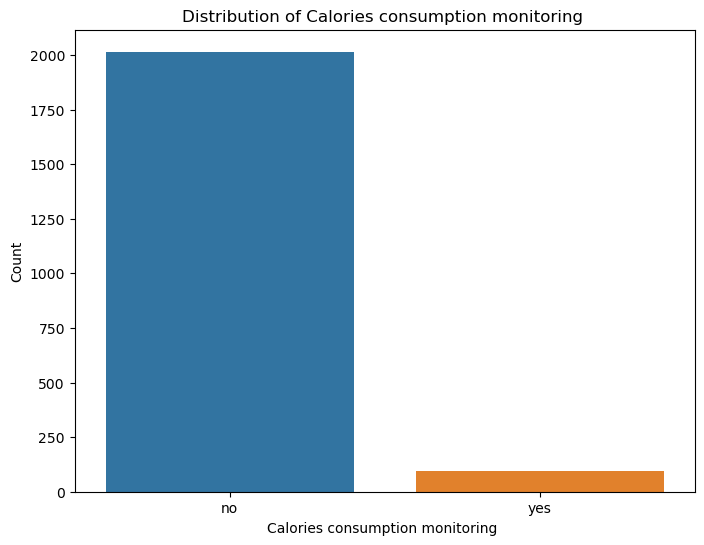

In [46]:
# Distribution of SCC
plt.figure(figsize=(8, 6))
sns.countplot(x='SCC', data=data)
plt.title('Distribution of Calories consumption monitoring ')
plt.xlabel('Calories consumption monitoring ')
plt.ylabel('Count')
plt.show()

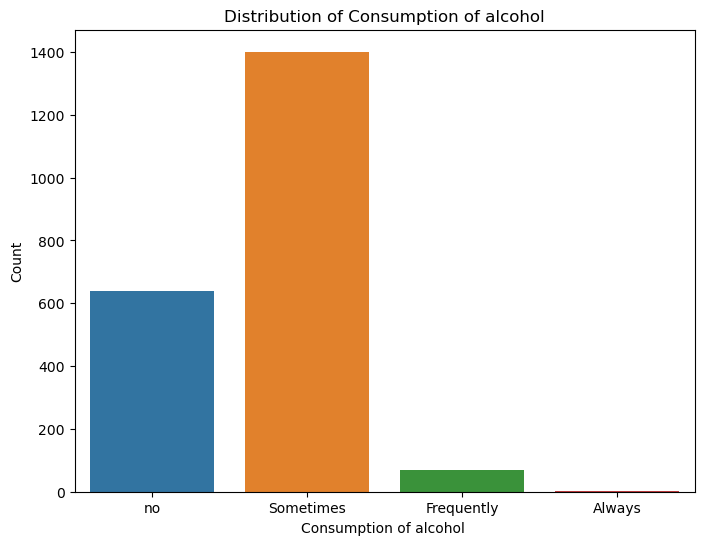

In [45]:
# Distribution of CALC
plt.figure(figsize=(8, 6))
sns.countplot(x='CALC', data=data)
plt.title('Distribution of Consumption of alcohol')
plt.xlabel('Consumption of alcohol ')
plt.ylabel('Count')
plt.show()

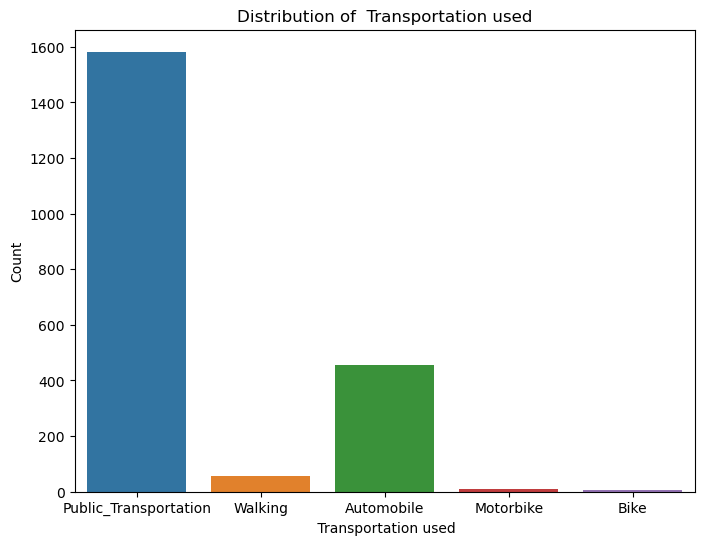

In [44]:
# Distribution of MTRANS
plt.figure(figsize=(8, 6))
sns.countplot(x='MTRANS', data=data)
plt.title('Distribution of  Transportation used')
plt.xlabel(' Transportation used')
plt.ylabel('Count')
plt.show()

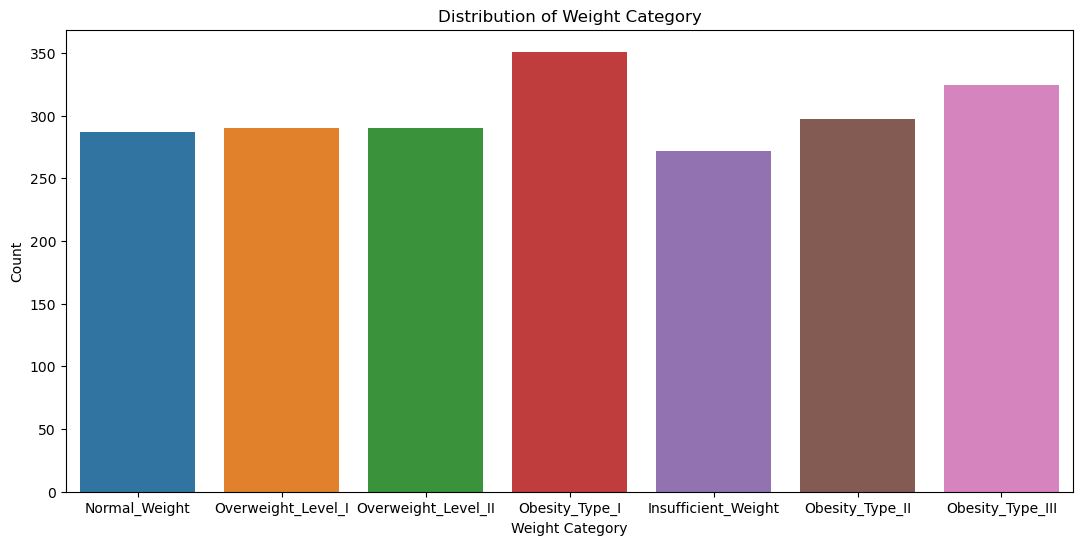

In [43]:
# Distribution of NObeyesdad
plt.figure(figsize=(13,6))
sns.countplot(x='NObeyesdad', data=data)
plt.title('Distribution of Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [53]:
# Encode categorical variables
categorical_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [59]:
# Split the dataset into features (X) and the target variable (y)
X = data_encoded.drop('NObeyesdad', axis=1)
y = data_encoded['NObeyesdad']

KeyError: "['NObeyesdad'] not found in axis"

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [60]:
print(data_encoded.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


In [61]:
# Split the dataset into features (X) and the target variable (y)
X = data_encoded.drop(['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'], axis=1)
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                  'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                  'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']]

In [65]:
# Perform one-hot encoding for the categorical variables
X_encoded = pd.get_dummies(X)

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: Modeling

In [96]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Predict on the testing data
y_pred = rf_model.predict(X_test_scaled)

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8794326241134752
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        62
           1       0.99      0.88      0.93        78
           2       1.00      0.95      0.97        58
           3       1.00      1.00      1.00        63
           4       0.98      0.82      0.89        56
           5       1.00      0.80      0.89        50

   micro avg       0.98      0.87      0.92       367
   macro avg       0.98      0.86      0.92       367
weighted avg       0.98      0.87      0.92       367
 samples avg       0.98      0.88      0.88       367



## Fine-Tuning

In [77]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [78]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [ ]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with the best parameters
final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the final model
y_pred_final = final_model.predict(X_test_scaled)
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Final Model Accuracy:", accuracy_final)
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred_final))

In [101]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END m

In [102]:
# Train the final model with the best parameters
final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [103]:
# Evaluate the final model
y_pred_final = final_model.predict(X_test_scaled)
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Final Model Accuracy:", accuracy_final)
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Final Model Accuracy: 0.8794326241134752
Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        62
           1       0.99      0.88      0.93        78
           2       1.00      0.95      0.97        58
           3       1.00      1.00      1.00        63
           4       0.98      0.82      0.89        56
           5       1.00      0.80      0.89        50

   micro avg       0.98      0.87      0.92       367
   macro avg       0.98      0.86      0.92       367
weighted avg       0.98      0.87      0.92       367
 samples avg       0.98      0.88      0.88       367

